In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import geopandas as gpd

In [3]:
#importing the data
df = pd.read_csv('covid_19_data.csv')

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 3 columns):
country         177 non-null object
country_code    177 non-null object
geometry        177 non-null geometry
dtypes: geometry(1), object(2)
memory usage: 4.2+ KB
        country country_code  \
159  Antarctica          ATA   

                                              geometry  
159  MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...  


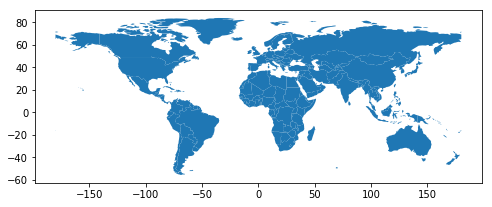

In [4]:
#shapefile for map
shapefile = 'shapefile/ne_110m_admin_0_countries.shp'
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
gdf.columns = ['country', 'country_code', 'geometry']
gdf.info()
print(gdf[gdf['country'] == 'Antarctica'])
#Drop row corresponding to 'Antarctica'
gdf = gdf.drop(gdf.index[159])

fig,ax = plt.subplots(figsize = (8,8))
gdf.plot(ax = ax)
plt.show()

In [ ]:
#want to plot the confirmed cases and deaths onto this graph for each Country/Region


In [10]:
df.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [11]:
df.tail(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
4503,4504,03/09/2020,"Williamson County, TN",US,2020-03-05T23:33:03,1.0,0.0,0.0
4504,4505,03/09/2020,"Yolo County, CA",US,2020-03-06T20:13:14,1.0,0.0,0.0
4505,4506,03/09/2020,NaN,Ukraine,2020-03-03T15:33:02,1.0,0.0,0.0
4506,4507,03/09/2020,NaN,Vatican City,2020-03-06T15:43:02,1.0,0.0,0.0
4507,4508,03/09/2020,From Diamond Princess,Australia,2020-02-29T02:03:10,0.0,0.0,0.0
4508,4509,03/09/2020,Northern Territory,Australia,2020-03-06T04:33:03,0.0,0.0,0.0
4509,4510,03/09/2020,"Lackland, TX (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
4510,4511,03/09/2020,"Montgomery County, TX",US,2020-03-07T19:53:02,0.0,0.0,0.0
4511,4512,03/09/2020,"Omaha, NE (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
4512,4513,03/09/2020,"Travis, CA (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513 entries, 0 to 4512
Data columns (total 8 columns):
SNo                4513 non-null int64
ObservationDate    4513 non-null object
Province/State     2912 non-null object
Country/Region     4513 non-null object
Last Update        4513 non-null object
Confirmed          4513 non-null float64
Deaths             4513 non-null float64
Recovered          4513 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 282.1+ KB


In [12]:
#could do the titanic thing and predict survived or not
#incubation period compared to confirmed???

df['Country/Region'].value_counts()

Mainland China            1482
US                         899
Australia                  209
Canada                     137
Hong Kong                   48
Taiwan                      48
Thailand                    48
Japan                       48
South Korea                 48
Macau                       48
Singapore                   47
Vietnam                     47
Malaysia                    46
France                      46
Nepal                       45
Cambodia                    43
Sri Lanka                   43
Germany                     42
Philippines                 41
United Arab Emirates        41
Finland                     41
India                       40
Italy                       39
Russia                      39
Sweden                      39
UK                          39
Spain                       38
Belgium                     35
Others                      32
Egypt                       25
                          ... 
Poland                       6
Bosnia a

In [24]:
#want to plot the deaths over time for mainland china and other major countries
df[df['Country/Region']=='Mainland China']['Deaths'].max()

3008.0

In [31]:
df[df['Country/Region']=='South Korea']['Confirmed'].max()

7478.0